In [1]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis_code.analyze_corpus import *

In [2]:
'''name definition'''
example = '/home/luluvyd/corpus/Reuters21578/examples/out.txt'
filename = '/home/luluvyd/corpus/Reuters21578/reuter-article.txt'

'''document in line format'''

'document in line format'

In [3]:
emos = loadEmotionWords('/home/luluvyd/corpus/NRC-Emotion-Lexicon-v0.92/Generated-EmotionWords.txt')

In [ ]:
'''
Example : break-up cmu movie view file
'''
with open(example, 'r', errors='replace') as f:
    r = processArticle(f, emos)
    print(r)
f.close()

In [4]:
'''
Corpus : get fraction score
'''
scores = []
with open(filename, 'r', errors='replace') as f:
    r = scoreArticle(f, emos)
    scores += r

In [5]:
len(scores)

14306

In [17]:
'''plot percentage score'''
scoresPer = np.array(scores)*100
maxScore = 40

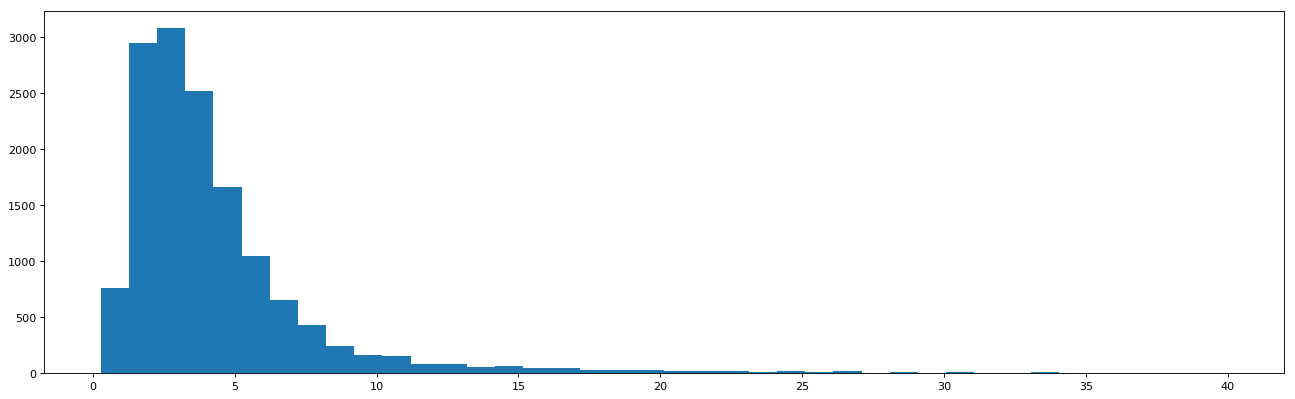

In [18]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
n_bins = 40
plt.hist(scoresPer,bins=n_bins)
plt.show()

In [15]:
'''closely look at the bottom 10 percent'''
scoresLow = [s for s in scores if s < 0.1]
scoresPer = np.array(scoresLow)*100
maxScore = 10

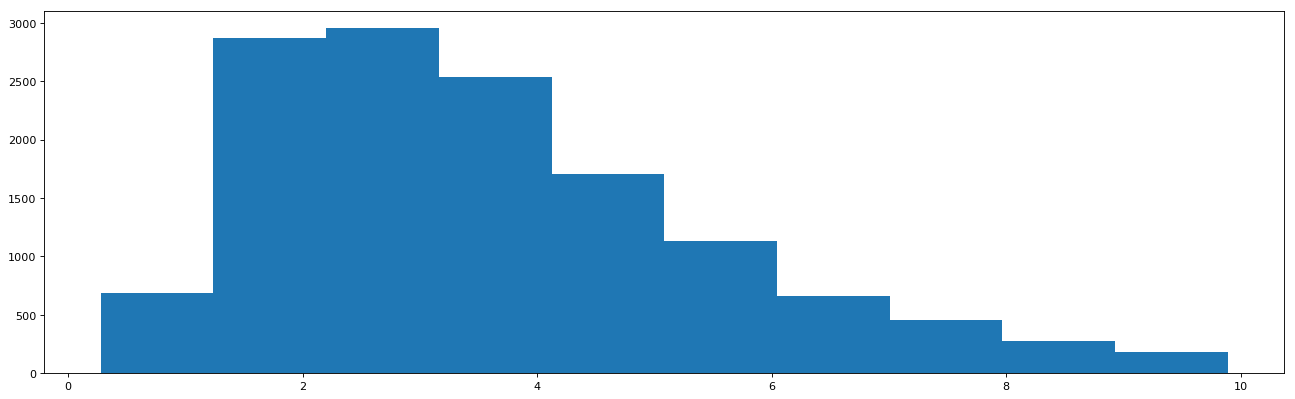

In [16]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
n_bins = 10
plt.hist(scoresPer,bins=n_bins)
plt.show()